# Лаб. вежба 3

Стефан Милев - 206055


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import homogeneity_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_excel("Data_Cortex_Nuclear.xls")
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [44]:
df.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [45]:
df.isna().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [46]:
len(df)

1080

In [47]:
df.dropna(inplace=True)

In [48]:
len(df)

552

In [49]:
df.isna().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [50]:
x = df.drop(["MouseID", "Genotype", "Treatment", "Behavior", "class"], axis=1)
y = df["class"]

In [51]:
x = StandardScaler().fit_transform(x)

# PCA


In [52]:
pca = PCA(2)

x_pca = pca.fit_transform(x)
x_pca

array([[ 6.2682903 , -3.48579712],
       [ 5.8254835 , -2.97455077],
       [ 6.87728833, -3.02751443],
       ...,
       [ 6.35244088,  4.41514934],
       [ 7.5705626 ,  5.22644707],
       [ 8.22955899,  5.51307806]])

<Axes: >

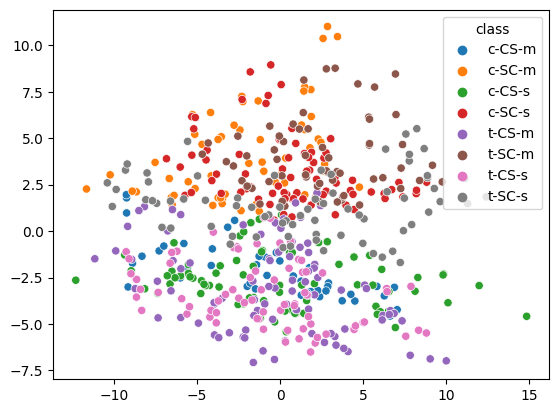

In [53]:
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y)

# Clustering


In [54]:
def visualize(pred: np.ndarray, name: str):
    tsne = TSNE(2)
    x_tsne = tsne.fit_transform(x)

    sns.scatterplot(
        x=x_tsne[:, 0],
        y=x_tsne[:, 1],
        hue=pred,
        palette="tab10",
    ).set_title(name)

In [55]:
def homogeinity(pred: np.ndarray):
    return homogeneity_score(y, pred)

In [56]:
clustering = {}

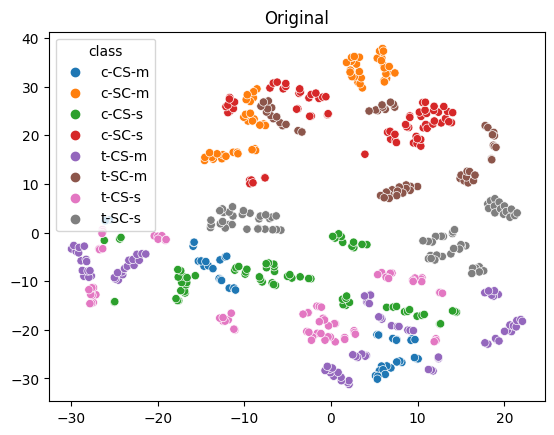

In [57]:
visualize(y, "Original")

# GaussianMixture


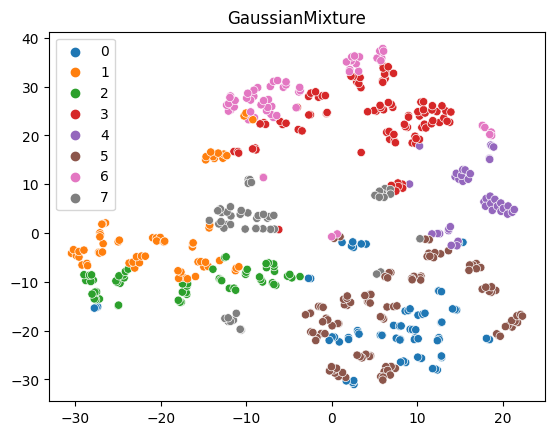

In [58]:
gaussian_mixture = GaussianMixture(len(np.unique(y)))
y_pred_gaussian_mixture = gaussian_mixture.fit_predict(x)

visualize(y_pred_gaussian_mixture, "GaussianMixture")
clustering["GaussianMixture"] = homogeinity(y_pred_gaussian_mixture)

# KMeans


c:\Users\Stefan\anaconda3\envs\ds\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


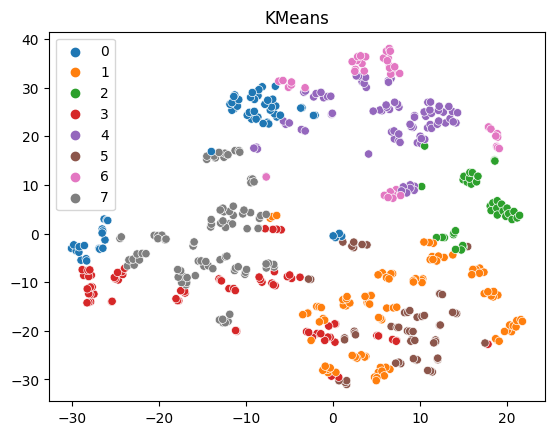

In [59]:
kmeans = KMeans(len(np.unique(y)))
y_pred_kmeans = kmeans.fit_predict(x)

visualize(y_pred_kmeans, "KMeans")
clustering["KMeans"] = homogeinity(y_pred_kmeans)

# Hierarchical Clustering

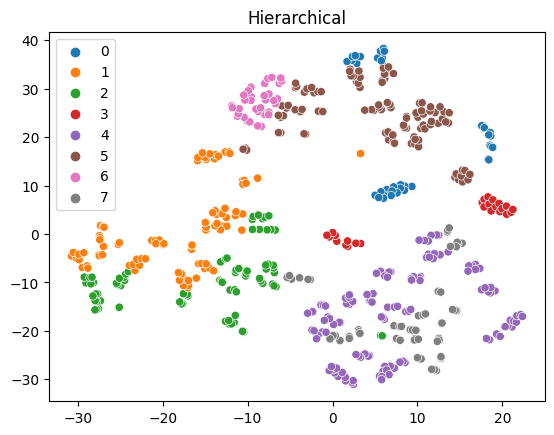

In [60]:
hierarchical = AgglomerativeClustering(len(np.unique(y)))
y_pred_hierarchical = hierarchical.fit_predict(x)

visualize(y_pred_hierarchical, "Hierarchical")
clustering["Hierarchical"] = homogeinity(y_pred_hierarchical)

# DBSCAN

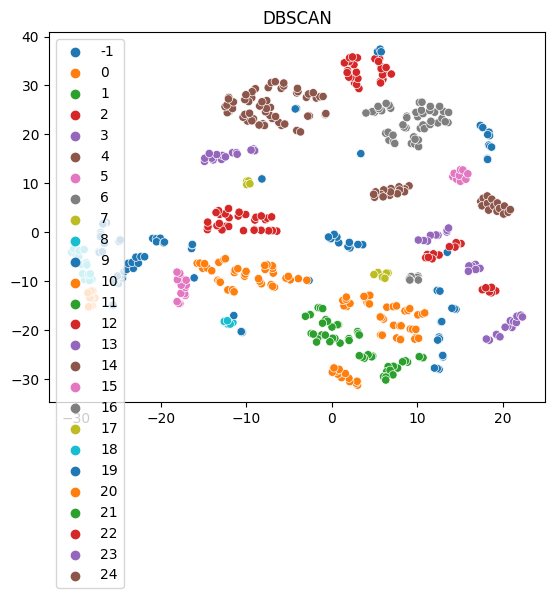

In [77]:
dbscan = DBSCAN(5)  # the chosen parameters are the ones that worked the best
y_pred_dbscan = dbscan.fit_predict(x)

visualize(y_pred_dbscan, "DBSCAN")
clustering["DBSCAN"] = homogeinity(y_pred_dbscan)

# Best model

It appears to be DBSCAN, according to homogeinity scores

<Axes: >

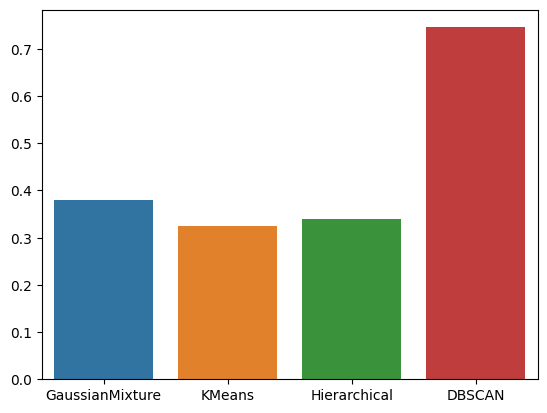

In [79]:
sns.barplot(x=list(clustering.keys()), y=list(clustering.values()))